In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


file_path = '/content/customer_segmentation_tech_industry.csv'
rfm_tech = pd.read_csv(file_path)


print(rfm_tech.head())


scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_tech[['Recency', 'Frequency', 'MonetaryValue']])


rfm_normalized = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])


print(rfm_normalized.head())


  CustomerID  Frequency    CustomerType ProductType  Recency  MonetaryValue
0   00e0d2e3          1      Individual    Software      273         986.07
1   00ebff09          2  Small Business    Software      260        1047.77
2   015b7cc7          2      Individual    Software       78         540.32
3   01acb293          1      Individual    Software      142        1489.73
4   01b2fba6          1      Individual    Software      101         286.06
    Recency  Frequency  MonetaryValue
0  0.848079  -0.894643       0.473005
1  0.723932  -0.006219       0.622966
2 -1.014131  -0.006219      -0.610383
3 -0.402944  -0.894643       1.697143
4 -0.794486  -0.894643      -1.228358


In [2]:
print("Mean of normalized features:\n", rfm_normalized.mean())
print("\nStandard deviation of normalized features:\n", rfm_normalized.std())


Mean of normalized features:
 Recency          1.190159e-16
Frequency       -1.079137e-16
MonetaryValue   -7.105427e-17
dtype: float64

Standard deviation of normalized features:
 Recency          1.0005
Frequency        1.0005
MonetaryValue    1.0005
dtype: float64


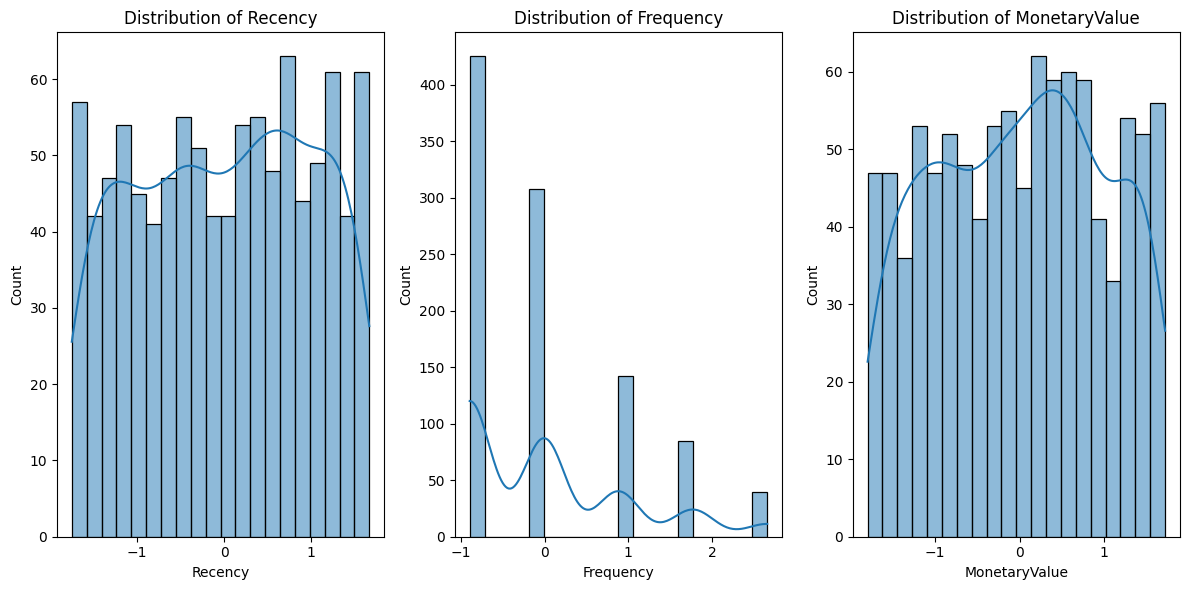

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Recency', 'Frequency', 'MonetaryValue']
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(rfm_normalized[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


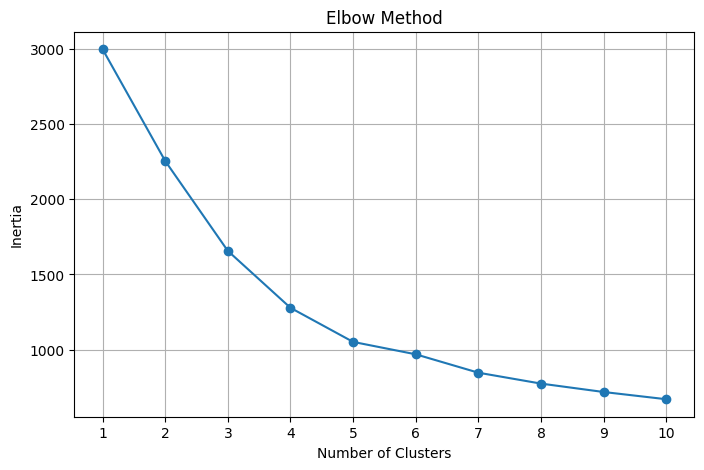

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_tech['Cluster'] = kmeans.fit_predict(rfm_normalized)


print(rfm_tech[['CustomerID', 'Cluster', 'Recency', 'Frequency', 'MonetaryValue']].head())


  CustomerID  Cluster  Recency  Frequency  MonetaryValue
0   00e0d2e3        1      273          1         986.07
1   00ebff09        1      260          2        1047.77
2   015b7cc7        0       78          2         540.32
3   01acb293        1      142          1        1489.73
4   01b2fba6        0      101          1         286.06


In [7]:

cluster_analysis = rfm_tech.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()


print(cluster_analysis)


            Recency  Frequency  MonetaryValue
Cluster                                      
0         65.030405   1.591216     798.885574
1        258.060484   1.443548    1147.313105
2        201.193878   3.841837     908.220306
3        236.584615   1.634615     355.544000


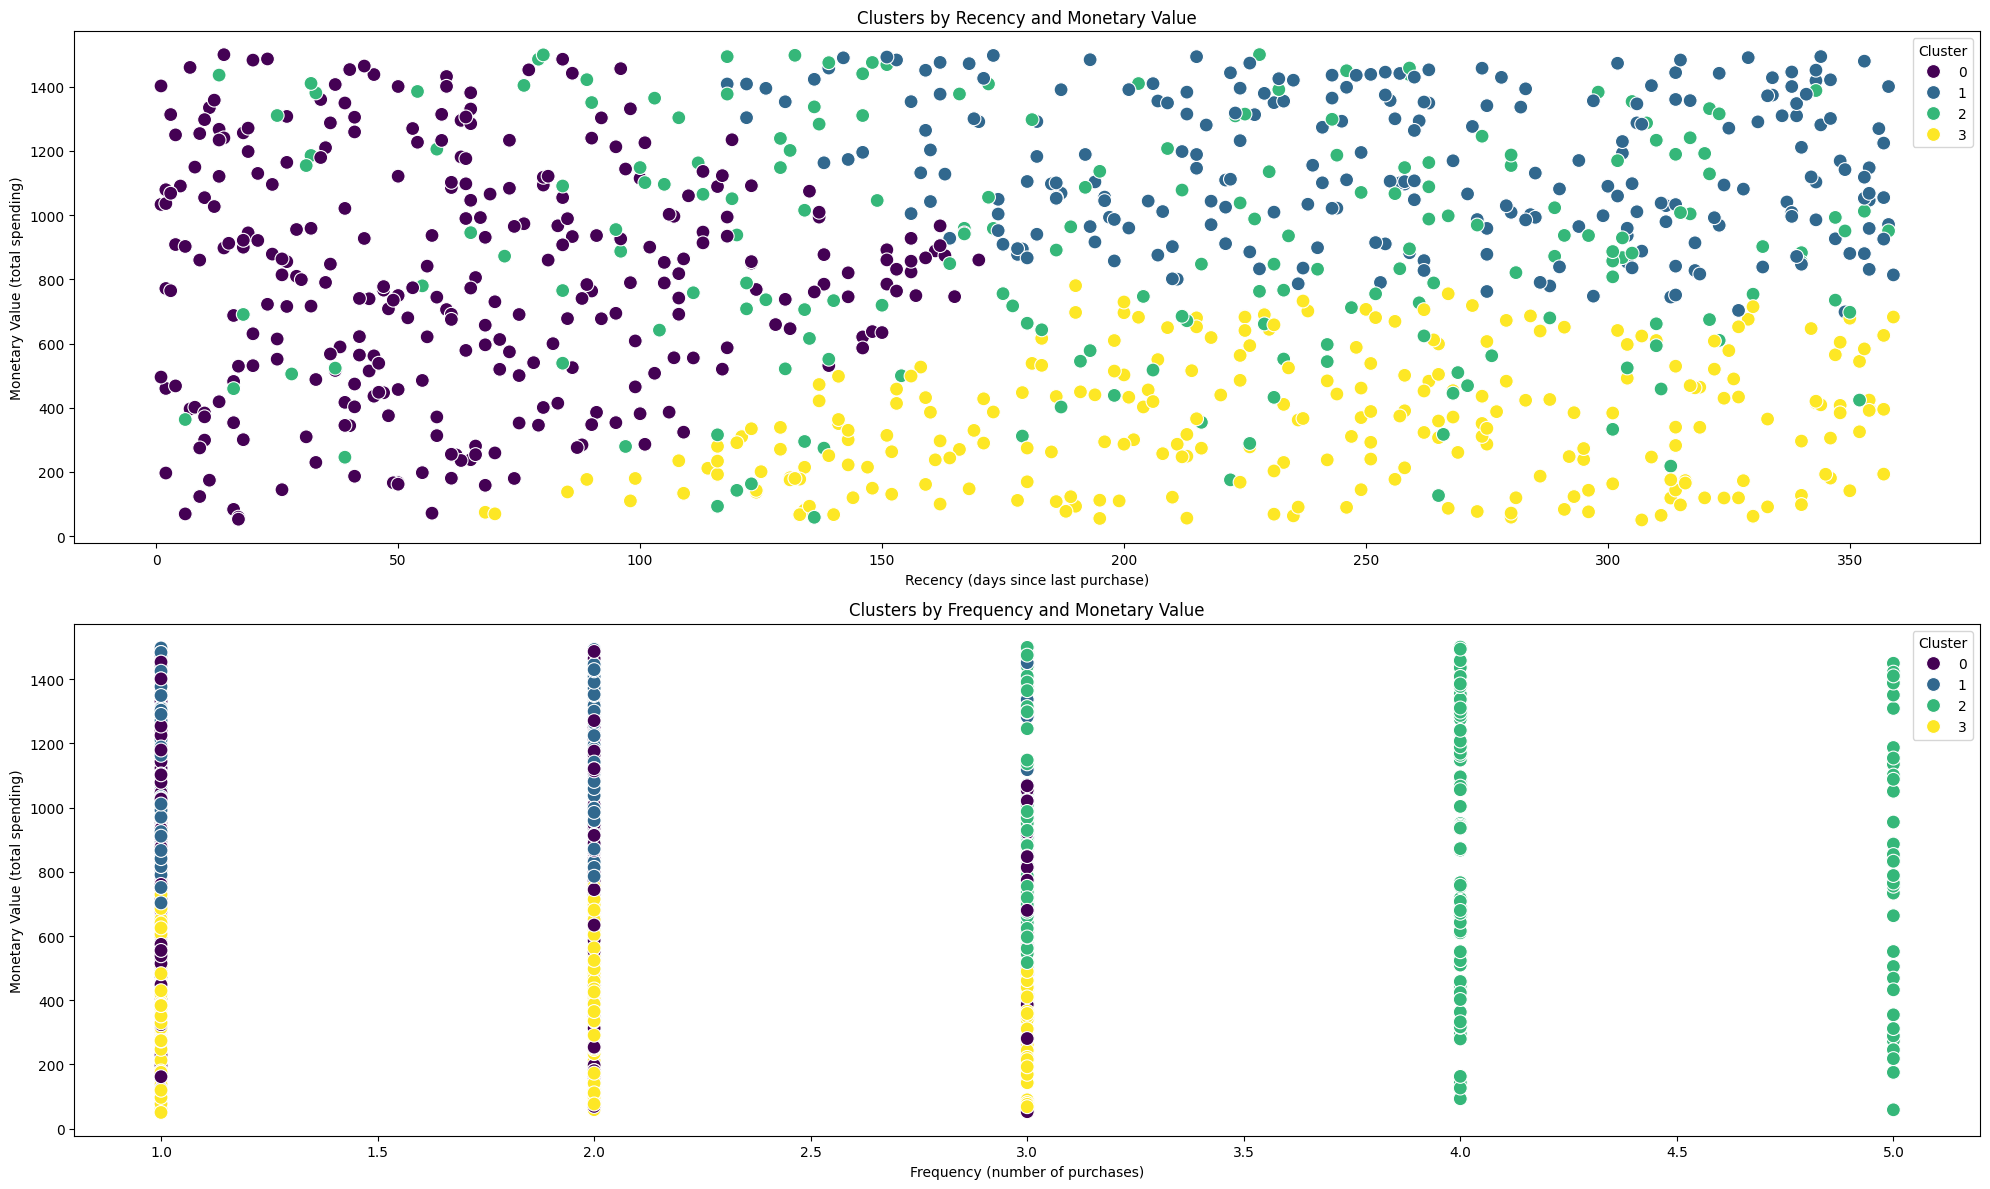

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.figure(figsize=(20, 12))


plt.subplot(2, 1, 1)
sns.scatterplot(data=rfm_tech, x='Recency', y='MonetaryValue', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters by Recency and Monetary Value')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Monetary Value (total spending)')
plt.legend(title='Cluster', loc='upper right')


plt.subplot(2, 1, 2)
sns.scatterplot(data=rfm_tech, x='Frequency', y='MonetaryValue', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters by Frequency and Monetary Value')
plt.xlabel('Frequency (number of purchases)')
plt.ylabel('Monetary Value (total spending)')
plt.legend(title='Cluster', loc='upper right')


plt.tight_layout()
plt.show()

fig = px.scatter_3d(rfm_tech, x='Recency', y='Frequency', z='MonetaryValue',
                    color='Cluster', symbol='Cluster',
                    title='3D Visualization of Customer Clusters',
                    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'MonetaryValue': 'Monetary Value'})
fig.show()
